# Mas o que é o Clean Architecture?

É uma arquitetura de software proposta por Robert Cecil Martin (ou Uncle Bob, como é mais conhecido) que tem por objetivo padronizar e organizar o código desenvolvido, favorecer a sua reusabilidade, assim como independência de tecnologia.

<div style="text-align: center;">
  <a href="https://blog.cleancoder.com/uncle-bob/2012/08/13/the-clean-architecture.html">
    <img src="https://blog.cleancoder.com/uncle-bob/images/2012-08-13-the-clean-architecture/CleanArchitecture.jpg" alt="Clean Architecture" width="500"/>
  </a>
</div>

Os formatos de dados usados ​​em um círculo externo não devem ser usados ​​por um círculo interno, especialmente se esses formatos forem gerados por uma estrutura em um círculo externo. Não queremos que nada no círculo externo tenha impacto nos círculos internos.

# Configurando um ambiente VENV com python

```bash
# Criando um ambiente venv
$ /python -m venv venv

# Ativando o ambiente venv
$ /source venv/Scripts/activate
```

# Instalando o Pylint

```bash
# Instalando lib
$ /pip install pylint
```

# Criando arquivo de configuração para o Vscode

```json
{
  "python.linting.enable": true,
  "python.linting.pylintEnabled": true,
}
```

# Criando arquivo de configuração do pylint para modificar algumas regras
```bash
# Criando o arquivo de configuração do pylint
$ /pylint --generate-rcfile > .pylintrc
```

# Criando arquivo requirements.txt
```bash
# Criando arquivo requirements.txt
$ /pip freeze > requirements.txt

# Para instalar os pacotes atraves de um arquivo requirements.txt
$ /pip install -r requirements.txt
```

# Instalando o gerente de commits git
```bash
# Instalando o pre-commit
$ /pip install pre-commit
```

# Criando arquivo de configuração para o funcionamento do pre-commit .pre-commit-config.yaml

```yaml
  repos:
    - repo: local
      hooks:
        - id: pylint
          name: pylint
          entry: pylint
          language: system
          type: [python]
          args:
            [
              "-rn", # Only display message
              "-sn", # Don't display the score
              "--rcfile=.pylintrc", # Link to your config file
              "--load-plugins=pylint.extensions.docparams", # Load an extension
            ]
  - repo: local
    hooks:
      - id: requirements
        name: requirements
        entry: bash -c 'pip freeze > requirements.txt; git add requirements.txt'
        language: system
        pass_filenames: false
        stages: [commit]
```

# Criando os diretórios para iniciar a construção do projeto:

- Criar pasta src:
  - Aqui vamos compilar todos os scripts python.
  - Criar o arquivo chamado __init__.py para facilitar a modularização dos nossos arquivos.
    - Criar a pasta infra dentro da pasta src:
      - Criar o arquivo __init__.py.
      - Criar uma pasta chamada db:
        - Criar o arquivo __init__.py.
        - Criar pasta chamada settings:
          - Criar o arquivo __init__.py.
          - Criar o arquivo connection.py, que será representado da seguinte forma:
            ```mermaid
              classDiagram

              class DBConnectionHandler {
                -connection_string: STRING
                -engine: OBJECT
                +session: OBJECT
              
                -create_database_engine() ANY
                +get_engine() OBJECT
                +__enter__() NONE
                +__exit__(exc_type, exc_val, exc_tb) NONE
              }
              ```
          - Agora vamos instalar o SQLAlchemy e o mysql-connector-python: 
            ```bash
            $ /pip install SQLAlchemy
            $ /pip install mysql-connector-python
            ```
          - 
            ```python
            """
            connection.py
            """
            import os


            from dotenv import load_dotenv
            from sqlalchemy import create_engine
            from sqlalchemy.orm import sessionmaker


            class DbConnectionHandler():

                def __init__(self):

                    load_dotenv()

                    self.__connection_string = "{}://{}:{}@{}:{}/{}".format(
                        os.getenv("DB_DRIVER"),
                        os.getenv("DB_USERNAME"),
                        os.getenv("DB_PASSWORD"),
                        os.getenv("DB_HOST"),
                        os.getenv("DB_PORT"),
                        os.getenv("DB_DATABASE")
                    )
                    self.__engine = self.create_database_engine()
                    self.session = None

                def create_database_engine(self):
                    engine = create_engine(self.__connection_string)
                    return engine
                
                def get_engine(self):
                    return self.__engine

                def __enter__(self):
                    sessionmake = sessionmaker(bind=self.__engine)
                    self.session = sessionmake()
                    return self

                def __exit__(self, exc_type, exc_val, exc_tb):
                    self.session.close()

            ```
          - Agora vamos instalar o pytest para realizar testes unitários:
            ```bash
            $ /pip install pytest
            ```
          - Agora vamos criar um arquivo chamado connection_test.py que o pytest irá reconhecer como teste unitário.
            ```python
            """
            connection_test.py
            """
            import pytest
            from .connection import DbConnectionHandler


            @pytest.mark.skip(reason="Sensive test")
            def test_create_database_engine():
                db_connection_handler = DbConnectionHandler()
                
                engine = db_connection_handler.get_engine()

                assert engine is not None

            ```
            - Agora para rodar o teste unitário teremos que instalar o módulo: pymysql:
              ```bash
              $ /pip install pymysql
              
              $ /pytest

              # Para rodar o teste e o script de teste com os prints:
              $ /pytest -s -v

              # Para carregar as variaveis de ambiente vamos usar a seguinte lib:
              $ /pip install dotenv
              ```
            
- Criar pasta init:
  - Aqui vamos  criar scripts que inicianizam os arquivos dentro da pasta src.
  - Criar um arquivo chamado schema.sql.

- Vamos criar agora uma classe chamada UsersRepository:
  ```mermaid
    classDiagram

      UsersRepository --|> DBConnectionHandler
      
      class UsersRepository {
        +insert_user() USER
        +select_user() LIST[USER]
      }

      class DBConnectionHandler {
        -connection_string: STRING
        -engine: OBJECT
        +session: OBJECT
      
        -create_database_engine() ANY
        +get_engine() OBJECT
        +__enter__() NONE
        +__exit__(exc_type, exc_val, exc_tb) NONE
      }

  ```

# Para isso vamos criar uma pasta chamada entities (entidades) dentro da pasta db.

- Antes devemos criar um arquivo chamado base.py dentro de settings!
  - 
    ```python
    """
    base.py
    """
    from sqlalchemy.orm import declarative_base


    Base = declarative_base()
    ```
- Para fazer a modularização também devemos criar o arquivo __init__.py dentro de entities!
  - dentro de entities vamos criar as instancias das tabelas do nosso banco de dados:
    ```python
    """
    users.py
    """
    from sqlalchemy import Column
    from sqlalchemy import String
    from sqlalchemy import Integer


    from src.infra.db.settings.base import Base


    class Users(Base):
        __tablename__ = "users"

        id = Column(
            Integer,
            primary_key=True,
            autoincrement=True
        )
        first_name = Column(
            String(255),
            nullable=False
        )
        last_name = Column(
            String(255),
            nullable=False
        )
        age = Column(
            Integer,
            nullable=False
        )

        def __repr__(self):
            return f"""
            Users [
                id={self.id} 
                first_name={self.first_name}
                last_name={self.last_name}
                age={self.age}
            ]
            """

    ```
- Dentro de db vamos criar outra pasta chamada de repositories!
  - Para fazer modulariação vamos criar o __init__.py.
  - Dentro dela vamos criar um arquivo chamado de users_repositories.py.
  - Este arquivo será a implementação do arquivo users.py dentro de entities!
  from src.infra.db.settings.connection import DbConnectionHandler
from src.infra.db.entities.users import Users as UsersEntity

    ```python
    class UsersRepository:
        
        @classmethod # Nos parametros os ": type-hitss" é como se fosse um tipo de comentário, ex docstring
        def insert_user(
            cls,
            first_name: str,
            last_name: str,
            age: int
        ) -> None: # A conveção diz que classes de métodos ao invés de self usasse cls

            with DbConnectionHandler() as database:
                try:
                    new_registry = UsersEntity(
                        first_name=first_name,
                        last_name=last_name,
                        age=age
                    )
                    database.session.add(new_registry)
                    database.session.commit()
                except Exception as ex:
                    database.session.rollback()
                    raise ex
                
        @classmethod
        def select_user(
            cls,
            first_name: str
        ) -> any:
            
            with DbConnectionHandler() as database:
                try:
                    users = (
                        database.session
                        .query(UsersEntity)
                        .filter(UsersEntity.first_name == first_name)
                        .all()
                    )
                    return users
                except Exception as ex:
                    database.session.rollback()
                    raise ex
                    
    ```

# Finalizamos nosso módulo infra e agora vamos iniciar nosso módulo de domain:

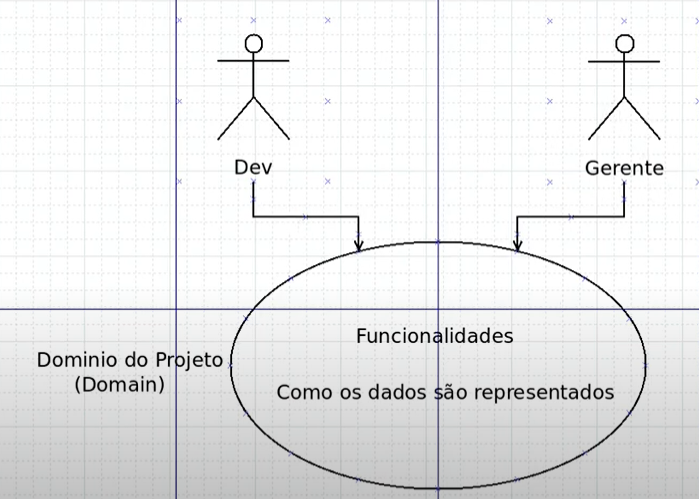

- Que nada mais é a conversa entre o Dev e o Gerente que não tem conhecimento algum sobre programação.
- Ali vamos mostrar a representação dos dados e as funcionalidades do projeto montado.
- Está pasta fica dentro de src, ao lado de infra.
    - Dentro desta pasta teremos nossos casos de uso (FUNCIONALIDADES), nossos modelos (REPRESENTAÇÃO DOS DADOS), também terá uma pasta chamada data (ONDE IREMOS APRESENTAR OS DADOS E FUNCIONALIDADES COM LÓGICA)
        - Portanto iremos criar uma pasta chamada "domain".
            - Dentro de domain vamos criar outra pasta chamada "use_cases".
                - Aqui vamos criar um arquivo chamado "user_finder.py", que seria exatamente uma funcionalidade onde o usuário do sistema informa um nome a ser pesquisado em nosso projeto e essa função retorna o resultado dessa busca que será buscado em nossa tabela no banco de dados.

                - Nesta pasta de casos de uso todas as classes que criarmos são apenas interfaces ou seja teremos que usar a biblioteca abc para definirmos as interfaces. Então aqui ainda não vamos definir como são exatamente a lógica das nossas funcionalidades, vamos apenas informar quais tipos de funcionalidades nossa classe deve possuir mas não como ela vai funcionar.

            - Também iremos criar uma pasta chamada "models".
                - Nesta pasta iremos criar nossas representações através de classes, de forma semelhante como fizemos usando SQLAlchemy em infra, mas aqui vamos criar a classe usando o método construtor usando o paradigma de POO, o arquivo terá o mesmo nome que existe na pasta infra/db/entities ou seja "users.py".
                - Está classe não tem ações, métodos e sim apenas atributos ou seja é uma classe que serve apenas para armazenar dados. Fazendo com que sirva para representar os dados das entidades existentes no sistema.

        - Criando a pasta chamada "data".
            - Dentro de data vamos criar outra pasta chamada "use_cases", a diferença é que nesta pasta que vamos implementar as interfaces criadas em domain/use_cases, ou seja é aqui que vamos criar a logica das funções implementando as interfaces pré definidas anteriormente.

            - Vamos criar outra pasta agora chamada "interfaces"
                - Aqui será criado a interface UsersRepositoryInterface que irá servir para conectar-se ao banco de dados.
                - Portanto iremos criar o arquivo users_repository.py

        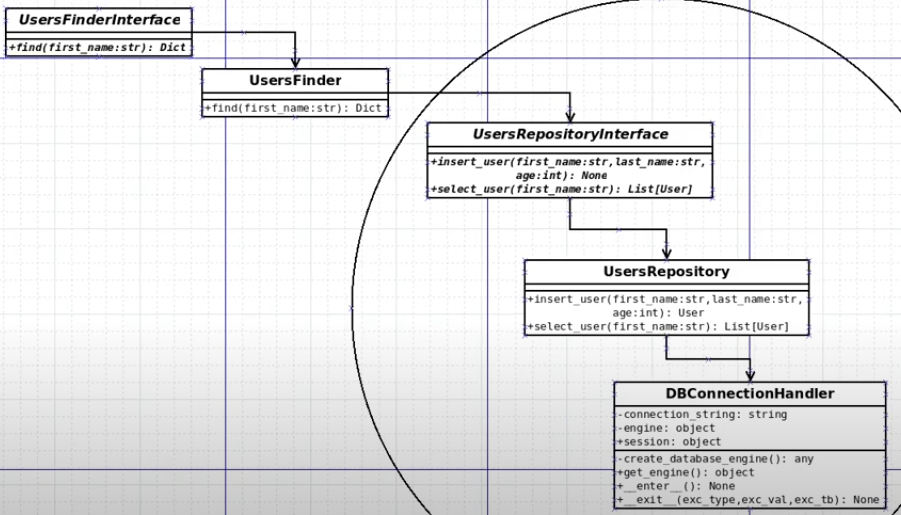

        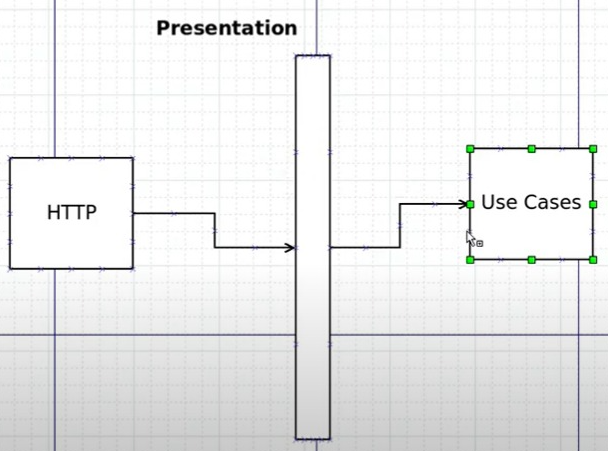

        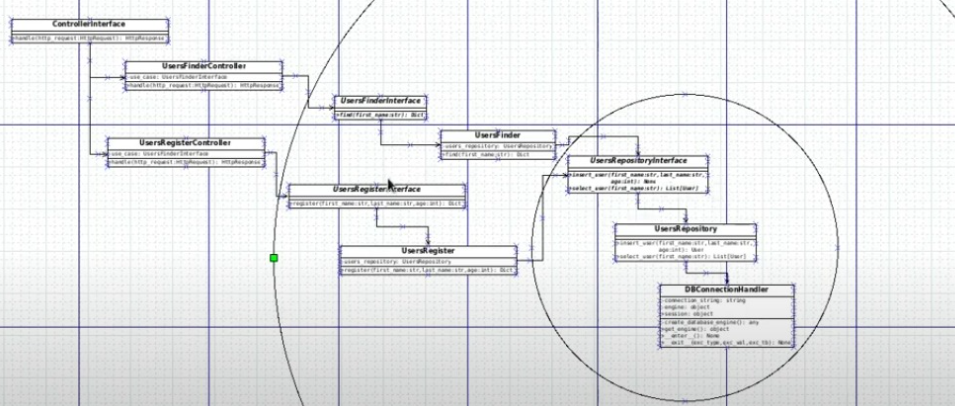